# Wind Turbine Power Production
___

###  Project assessment
#### [Fundamentals of Data Analysis Module GMIT 2020 ]

<br>

<img align="left" width="300" src="https://www.pinclipart.com/picdir/big/153-1532157_wind-turbine-icon-on-green-background-wind-turbine.png">
<br>

<br>

Lecturer: _[Ian McLoughlin](https://github.com/ianmcloughlin)_

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*

---

## Table of Contents

* [Overview](#overview)
* [General Setup](#setup)
* [Reading the Data and Performing Basic Data Checks](#loading_data)
* [Data Preprocessing](#preproccesing)
    * [Removing Outliers](#outliers)
    * [Creating Arrays for the Speed and the Power Variables](#arrays)
    * [Scaling](#scale)
    * [Creating the Training and Test Data sets](#split)
* [Build, Predict, and Evaluate the Models](#models)
    * [](#)
    * [](#)
    * [](#)

<br>

### Overview. <a name="overview"></a>
___

Wind turbine power output is known for having a strong correlation with wind speed. In this work, three models were built for predicting the turbine response for a given wind speed: Simple Linear Regression [1],  [2], and  [3]. The notebook also includes an analysis of a data set **powerproduction** and its preprocessing. 

The performance evaluation of the models was conducted using two metrics - R-squared regression score [4] and Root Mean Squared Error (RMSE) [5]. The indicators of a good model are low RMSE and high R-squared regression score.

> [1] [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
<br>
[2] []()
<br>
[3] []()
<br>
[4] [How to calculate R squared with NumPy in Python]( https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python)
<br>
[5] [How to calculate RMSE using IPython/NumPy?](https://stackoverflow.com/questions/21926020/how-to-calculate-rmse-using-ipython-numpy)

<br>

### General Setup. <a name="setup"></a>
___

In [1]:
# Numerical arrays.
import numpy as np

# Model
from numpy.polynomial.polynomial import Polynomial as poly

# Data frames.
import pandas as pd

from scipy import stats
# Plotting.
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Style for plots.
plt.style.use('ggplot')
plt.rcParams["figure.titlesize"] = 18

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

### Reading the Data and Performing Basic Data Checks. <a name="loading_data"></a>
___


In [3]:
# Load the data set.
df = pd.read_csv("powerproduction.txt")

# Display the data frame.
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The data set has 500 rows and 2 columns with two numerical variables, **speed** and **power**, which are represented by real numbers. There are no empty values in the data set.

In [4]:
# Generate descriptive statistics.
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The mean speed is 12.59, while the mean power stands at 48.01. Moreover, there is a difference in the scale of the variables: speed has a range between 0.00 to 25.00 and power - between 0.00 and 113.556. This difference will be addressed in the preprocessing.

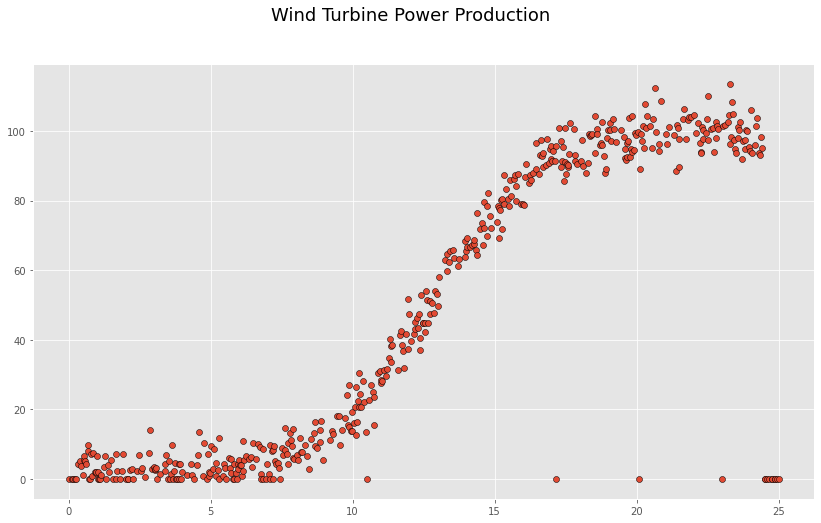

In [5]:
# Create a figure. axis and title.
fig,ax = plt.subplots()
fig.suptitle("Wind Turbine Power Production")

# Plot the data.
ax.scatter(df.speed, df.power,edgecolor="black")

# Show the plot.
plt.show()

The above plot shows that the data follows a polynomial regression. The relationship between Power and Speed predominantly takes an "S"-shape. The power rises dramatically with speed over about 8 m/s and slows when the speed reaches about 17 m/s.

Additionally, we can see some outliers where the speed is between 5 m/s and 24 m/s. However, the power is still 0. The 0 power points for around 25 m/s wind speed might be suggestting the shutdown of the wind turbine for damage mitigation, thus I will not consider them as outliners.

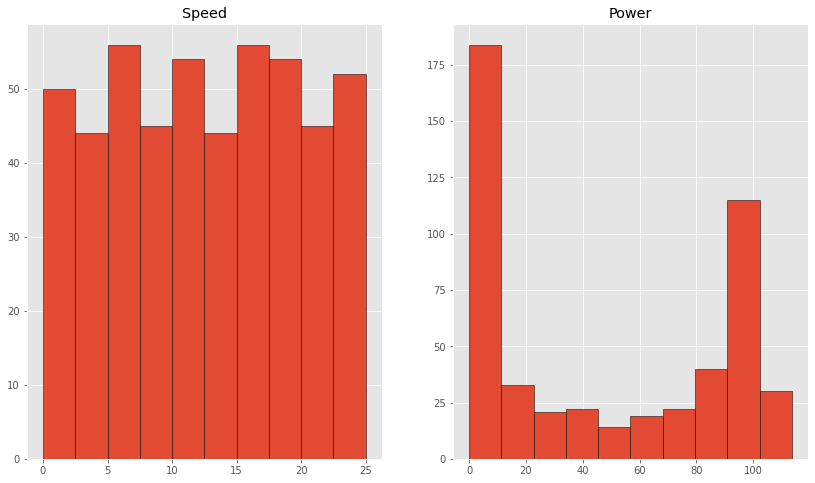

In [6]:
# Create a figure, axis 1x2 and titles
fig, [ax1,ax2] = plt.subplots(1,2)
ax1.set_title("Speed")
ax2.set_title("Power")

# Plot data.
ax1.hist(df.speed, edgecolor="black")
ax2.hist(df.power, edgecolor="black")

# Show the plots.
plt.show()

<br>

From the historgrams above, the data does not appear to attain normal distribution and it is difficult to say which type of distribution will fit any of the variables with any degree of certainty.

<br>

###  Data Preprocessing. <a name="preproccesing"></a>
___

Prior to building models the data should undergo data preprocessing. 

There are 4 steps:
* Removing Outliers
* Creating arrays for the speed and the power.
* Scaling to account for the difference in scale of the variables.
* Creating the training and test data sets.

#### 1. Removing Outliers.  <a name="outliers"></a>
The first step is to remove the outliers from our data set. [5]

> [5] [Delete rows based on multiple conditions; including other column conditionals](https://stackoverflow.com/questions/31997992/delete-rows-based-on-multiple-conditions-including-other-column-conditionals)

In [7]:
# Remove Outliers.
df_new = df.drop(df[(df.power == 0) & (df.speed > 5) & (df.speed < 24)].index)

# Display the cleaned data set.
df_new

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


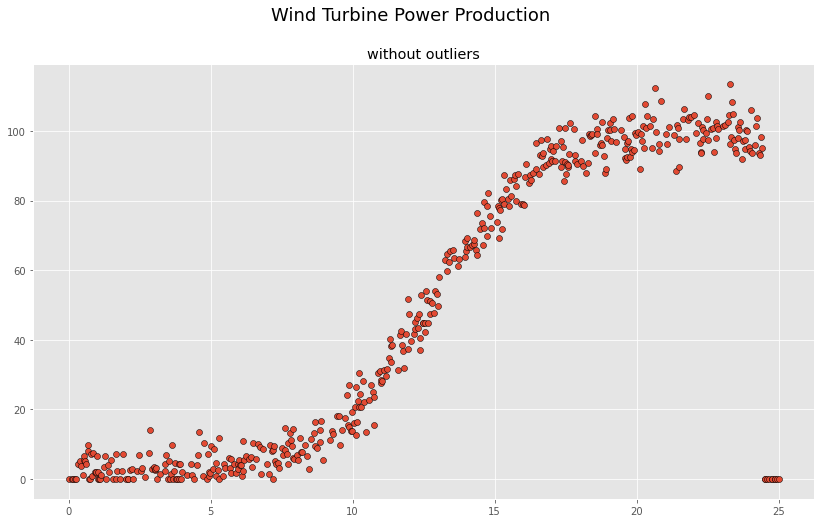

In [8]:
# Create a figure. axis and title.
fig,ax = plt.subplots()
fig.suptitle("Wind Turbine Power Production")
ax.set_title("without outliers")

# Plot the data.
ax.scatter(df_new.speed, df_new.power,edgecolor="black")

# Show the plot.
plt.show()

<br>

#### 2. Creating Arrays for the Speed and the Power Variables.  <a name="arrays"></a>

Now the data set should be separated for speed and power values. I will also preprocess a few speed samples for 0 m/s, 30 m/s, 70 m/s as it is known from the data set that the power output should be 0. 

In [9]:
# Separate speed and power.
speed = df_new.iloc[:, 0].values
power = df_new.iloc[:, 1].values

# Convert them into a numpy array and reshape.
X = np.array(speed)
y = np.array(power)

<br>

#### 3. Scaling. <a name="scale"></a>
Next we can scale the variables. By comparing different scalers I reached the conclusion that the best results are achieved with MinMaxScaler. [6]

> [6] [Normalization Techniques in Python Using NumPy](https://towardsdatascience.com/normalization-techniques-in-python-using-numpy-b998aa81d754)

In [10]:
# Rescale data.
X_scaled = (X - np.min(X)) / np.ptp(X)
y_scaled = (y - np.min(y)) / np.ptp(y)

# Rescaled data set.
df_rescaled = pd.DataFrame({"speed":X_scaled, "power":y_scaled})
df_rescaled

,speed,power
0,0.000,0.0
1,0.005,0.0
2,0.006,0.0
3,0.009,0.0
4,0.011,0.0
...,...,...
482,0.991,0.0
483,0.994,0.0
484,0.995,0.0
485,0.998,0.0


<br>

#### 4. Creating the Training and Test Data sets.  <a name="split"></a>
We will build our model on the training set and evaluate its performance on the test set.

> [7] [Train test split without using scikit learn](https://stackoverflow.com/questions/47202182/train-test-split-without-using-scikit-learn/47202397)
<br>
[8] [pandas.DataFrame.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)

In [11]:
# Shuffle the data set 
shuffle_df = df_rescaled.sample(frac=1, random_state=1)

# Define a size for your train set 
train_size = int(0.7 * len(df_rescaled))

# Split the data on training and test
speed_train, speed_test = shuffle_df.speed[:train_size].values, shuffle_df.speed[train_size:].values
power_train, power_test = shuffle_df.power[:train_size].values, shuffle_df.power[train_size:].values

# Print the shape of the new sets.
print(f"Training set: {speed_train.shape}, {power_train.shape}")
print(f"Test set: {speed_test.shape}, {power_test.shape}")

Training set: (340,), (340,)
Test set: (147,), (147,)


<br>

### Build, Predict, and Evaluate the Models. <a name="models"></a>

<br>

#### Simple Linear Regression.  <a name="lr"></a>
___

Hypothesis Function For Simple Linear Regression

$y = beta_0 + beta_1 * x$

<br>

_Model Building._

<br>

>[8] [How to sort with lambda in Python](https://stackoverflow.com/questions/3766633/how-to-sort-with-lambda-in-python)


In [12]:
# Create a model and fit it.
linear = poly.fit(speed_train, power_train, 1)
linear

Polynomial([0.42812243, 0.55525802], domain=[0., 1.], window=[-1.,  1.])

<br>

_Prediction_

Now that we have the model created, we can make predictions on the training and test data and plot them along with the actual data.

In [13]:
# Predict power from train and test speed.
y_train_linear = linear(speed_train)
y_test_linear = linear(speed_test)

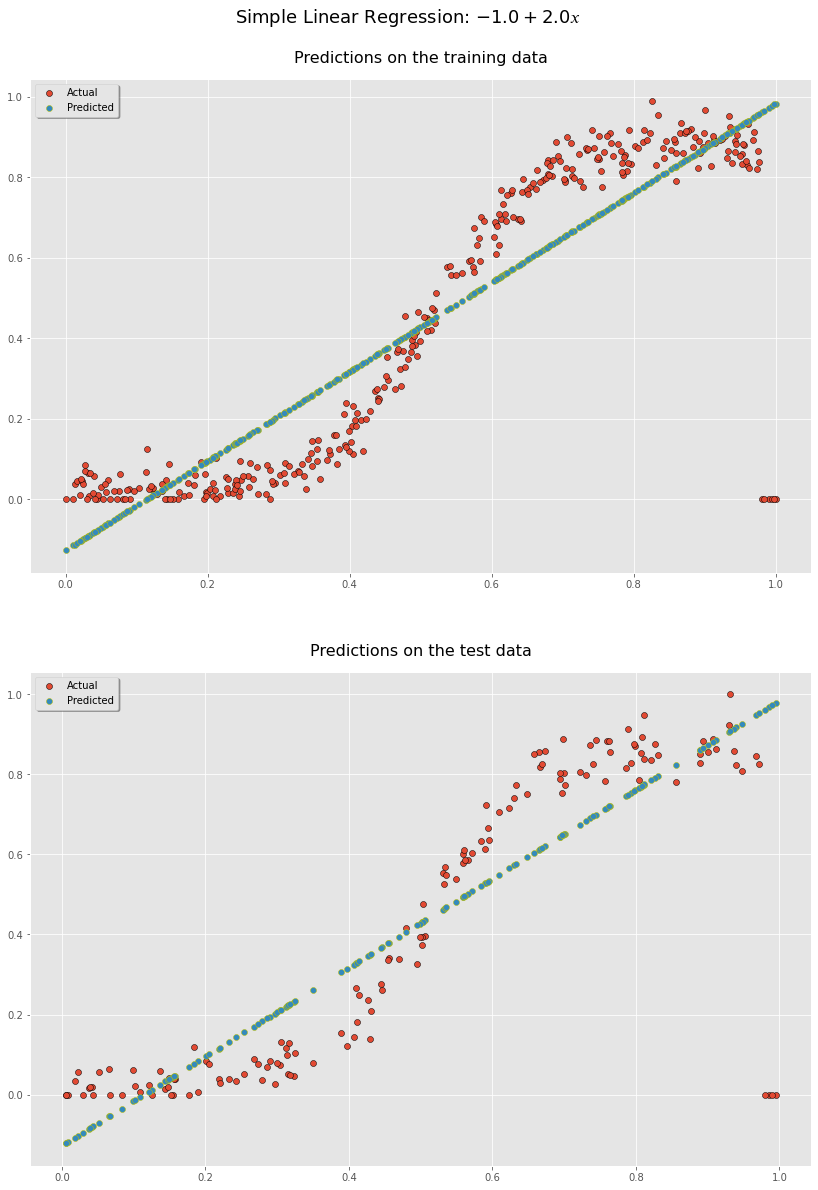

In [14]:
# Plot actual and predicted data.
def plot(pred_train, pred_test, title):
    # Create a figure, axis and titles.
    fig, [ax1,ax2] = plt.subplots(2,1, figsize=(14,20))
    fig.suptitle(f"{title}", y = 0.93)
    ax1.set_title("Predictions on the training data",y=1.02, fontsize=16)
    ax2.set_title("Predictions on the test data",y=1.02, fontsize=16)

    # Plot the actual training data and predictions.
    ax1.scatter(speed_train, power_train, edgecolor="black",  label="Actual")
    ax1.scatter(speed_train, pred_train, edgecolor="y", label="Predicted")

    # Plot the actual test data and predictions.
    ax2.scatter(speed_test, power_test, edgecolor="black",  label="Actual")
    ax2.scatter(speed_test, pred_test, edgecolor="y", label="Predicted")

    # Show the legend.
    ax1.legend(loc='upper left', shadow=True)
    ax2.legend(loc='upper left', shadow=True)

    # Show the plot.
    plt.show()

plot(y_train_linear, y_test_linear, "Simple Linear Regression: $-1.0+2.0𝑥$")

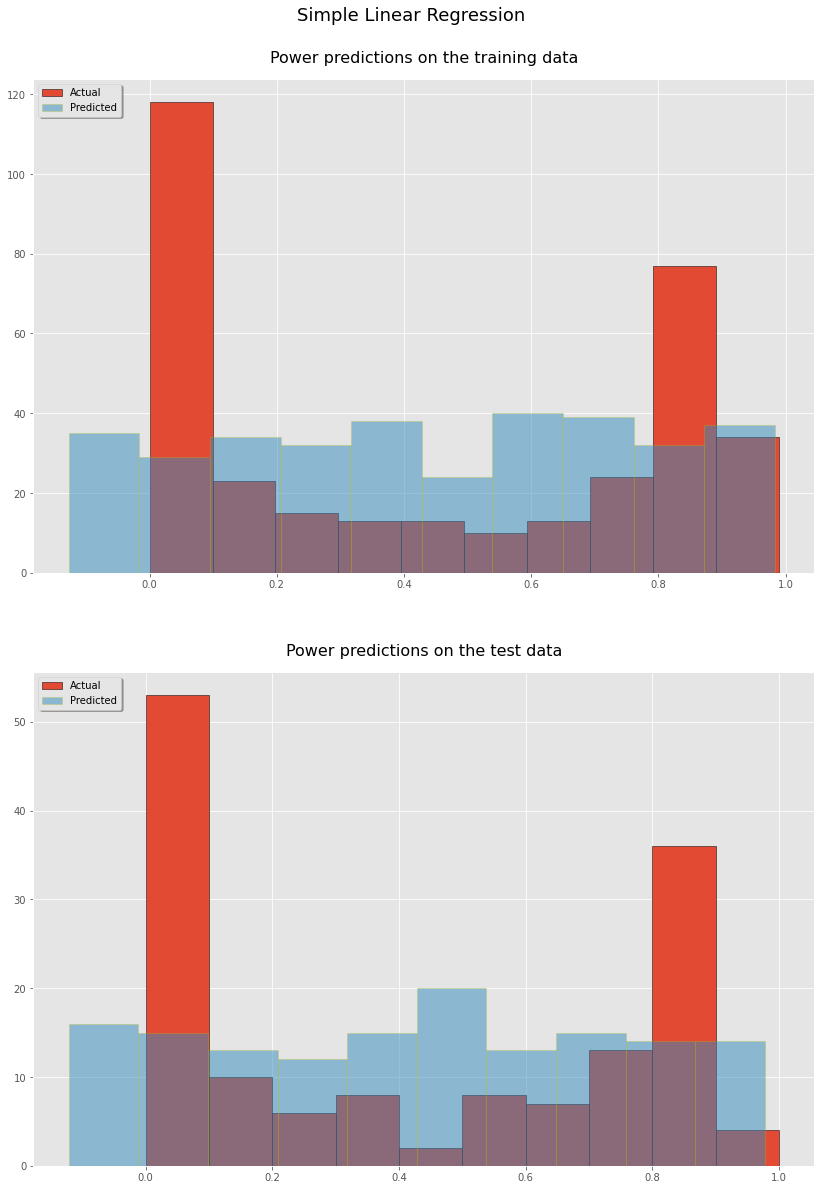

In [15]:
def hist(pred_train, pred_test, title):
    # Create a figure, axis and titles.
    fig, [ax1,ax2] = plt.subplots(2,1, figsize=(14,20))
    fig.suptitle(f"{title}", y = 0.93)
    ax1.set_title("Power predictions on the training data",y=1.02, fontsize=16)
    ax2.set_title("Power predictions on the test data",y=1.02, fontsize=16)

    # Plot the actual training data and predictions.
    ax1.hist(power_train, edgecolor="black",  label="Actual")
    ax1.hist(pred_train, edgecolor="y", label="Predicted", alpha=0.5)

    # Plot the actual test data and predictions.
    ax2.hist(power_test, edgecolor="black",  label="Actual")
    ax2.hist(pred_test, edgecolor="y", label="Predicted", alpha=0.5)

    # Show the legend.
    ax1.legend(loc='upper left', shadow=True)
    ax2.legend(loc='upper left', shadow=True)

    # Show the plot.
    plt.show()

hist(y_train_linear, y_test_linear, "Simple Linear Regression")

In [16]:
# Unscaling power output and removing negative values and values over 25 m/s.
def unscale(power):
    power_unscaled =  power * np.ptp(y) + np.min(y)
    if power_unscaled < 0.0 or power_unscaled > np.max(y):
        return 0.0
    else:
        return f"{power_unscaled:.3f}"

In [17]:
def comparison(model, pred_train, pred_test):
    # Printing actual and predicted training power.
    print(f"TRAINING DATA\nActual power:\t {unscale(power_train[20])}")
    print(f"Predicted power: {unscale(pred_train[20])}")

    # Printing actual and predicted test power.
    print(f"\nTEST DATA\nActual power:\t {unscale(power_test[32])}")
    print(f"Predicted power: {unscale(pred_test[32])}")

    # Printing predicted power for 0, 30 and 70 m/s speed.
    print("\nWITHOUT THE CONSTRAINT")
    print(f"Predicted power for wind speed 0: {(model(0)* np.ptp(y) + np.min(y))}")
    print(f"Predicted power for wind speed 30: {(model(30)* np.ptp(y) + np.min(y))}")
    print(f"Predicted power for wind speed 70: {(model(70)* np.ptp(y) + np.min(y))}")

    # Printing predicted power for 0, 30 and 70 m/s speed.
    print("\nWITH THE CONSTRAINT")
    print(f"Predicted power for wind speed 0: {unscale(linear(0))}")
    print(f"Predicted power for wind speed 30: {unscale(linear(30))}")
    print(f"Predicted power for wind speed 70: {unscale(linear(70))}")
    
comparison(linear, y_train_linear, y_test_linear)

TRAINING DATA
Actual power:	 98.078
Predicted power: 81.121

TEST DATA
Actual power:	 65.596
Predicted power: 56.127

WITHOUT THE CONSTRAINT
Predicted power for wind speed 0: -14.437009247641738
Predicted power for wind speed 30: 3768.73577175392
Predicted power for wind speed 70: 8812.96614642267

WITH THE CONSTRAINT
Predicted power for wind speed 0: 0.0
Predicted power for wind speed 30: 0.0
Predicted power for wind speed 70: 0.0


In [18]:
# R squared score
def r_2(x,y):
    correlation_matrix = np.corrcoef(x, y)
    r_squared = correlation_matrix[0,1]**2
    return r_squared

# RMSE
def rmse(x,y):
    rmse = np.sqrt(np.mean((y-x)**2))
    return rmse

# Calculate a score and RMSE for the train data.
def train(pred):
    print("TRAINING DATA\nRMSE: \t\t", rmse(power_train,pred))
    print("R-squared Score:", r_2(power_train, pred))

def test(pred):
    print("\nTEST DATA\nRMSE: \t\t", rmse(power_test,pred))
    print("R-squared Score:", r_2(power_test,pred))

train(y_train_linear)
test(y_test_linear)

TRAINING DATA
RMSE: 		 0.17499621284165545
R-squared Score: 0.773015158055552

TEST DATA
RMSE: 		 0.19666060415232325
R-squared Score: 0.6991996513082245


<br>

#### Non-linear Regression <a name="nlr"></a>

___

This model demonstrates how to approximate a function with a polynomial features by using Non-Linear regression.

<br>

_Model Building._

<br>

In [33]:
# Create a model and fit it.
nonlinear = poly.fit(speed_train, power_train, 10)
nonlinear

Polynomial([  0.42326779,   1.31139961,  -0.2403044 ,  -1.91567432,
         4.30118343,  -1.95394129, -17.0522594 ,   9.11882232,
        25.86114933,  -6.63201296, -13.38180347], domain=[0., 1.], window=[-1.,  1.])

<br>

_Prediction_

Now that we have the model created, we can make predictions on the training and test data and plot them along with the actual data.

In [34]:
# Predict power from train and test speed.
y_train_nonlinear = nonlinear(speed_train)
y_test_nonlinear = nonlinear(speed_test)

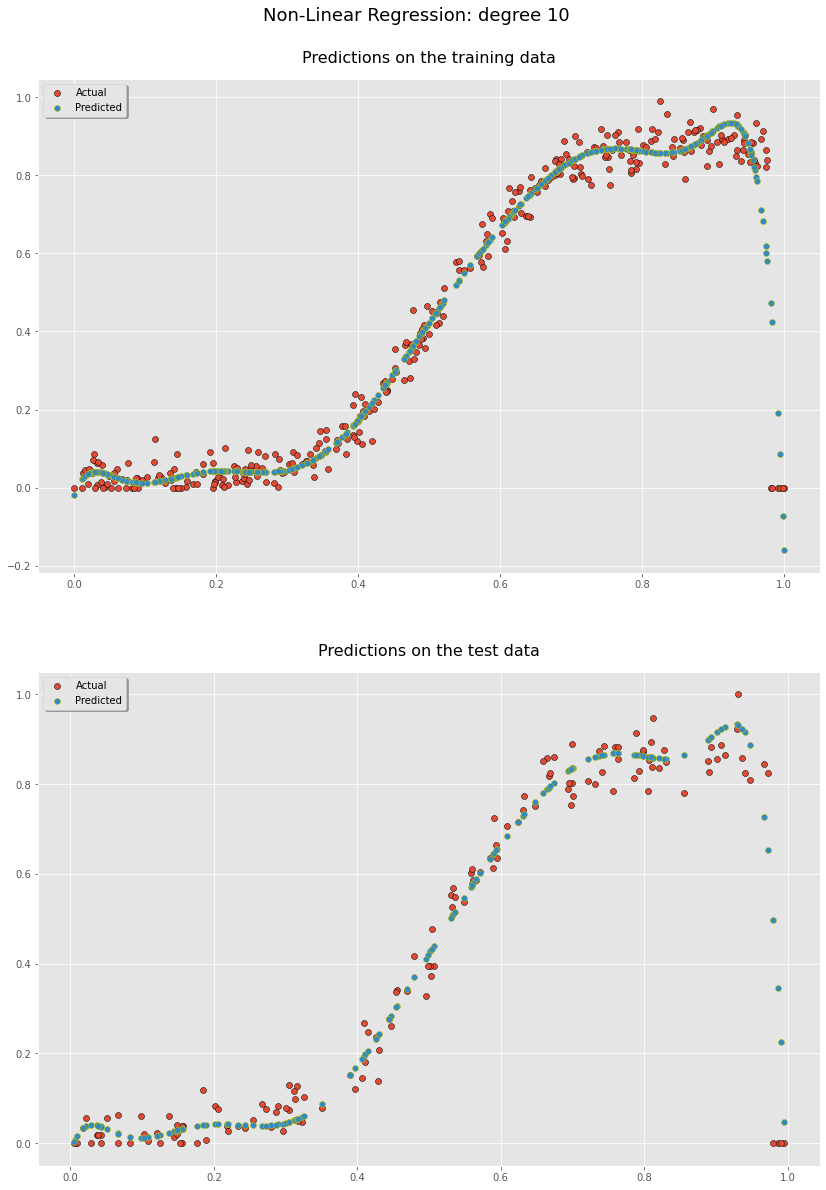

In [35]:
plot(y_train_nonlinear, y_test_nonlinear, "Non-Linear Regression: degree 10")

<br>

The predicted data appears to be well-fitting to the actual data. However, it has negative values and the variables in the original data set are non-negative. This can be fixed by adding a simple constraint.

To view the results the rescaled power needs to be transformed back. For comparison of the actual and predicted power I randomly chose the 20th row from training power and the 32nd from test power. Additionally, I will check if the predicted power is 0 for 0 m/s, 30 m/s and 70 m/s. 

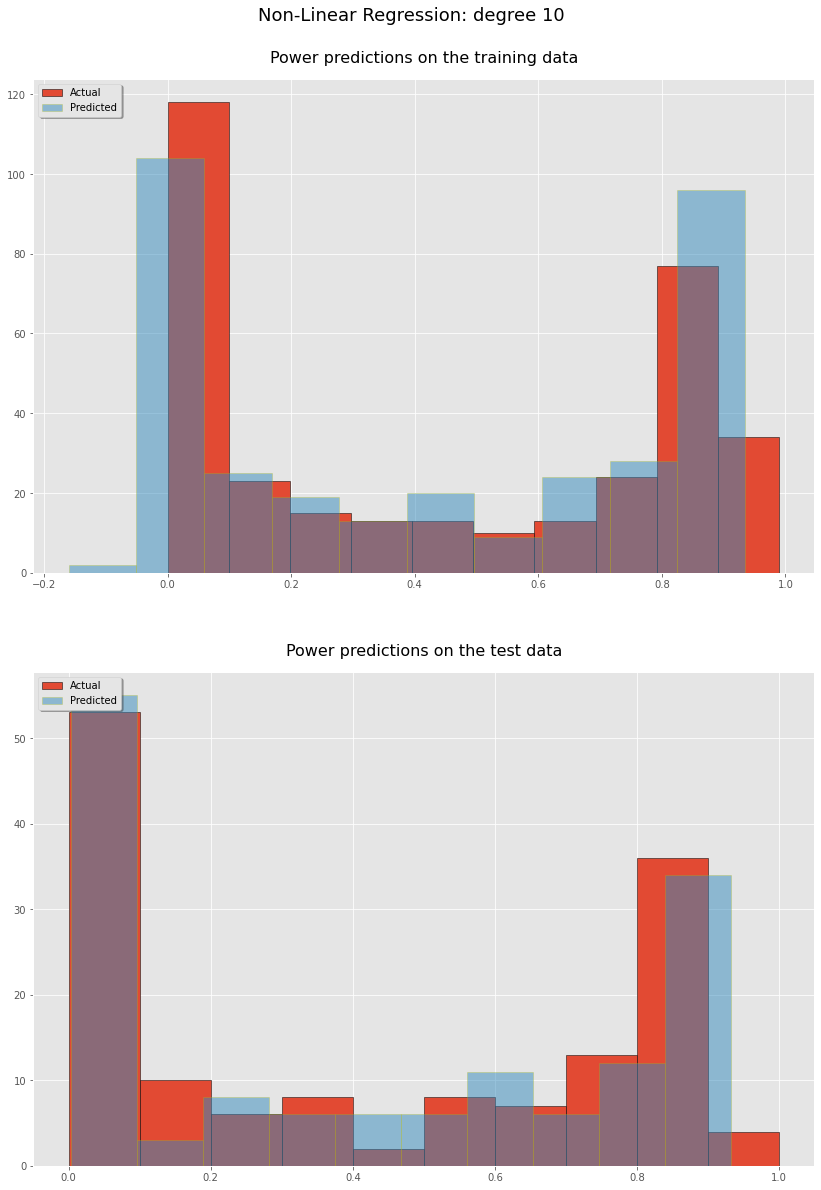

In [36]:
hist(y_train_nonlinear, y_test_nonlinear, "Non-Linear Regression: degree 10")

In [37]:
comparison(nonlinear, y_train_nonlinear, y_test_nonlinear)

TRAINING DATA
Actual power:	 98.078
Predicted power: 98.568

TEST DATA
Actual power:	 65.596
Predicted power: 65.137

WITHOUT THE CONSTRAINT
Predicted power for wind speed 0: -1.9713423439504392
Predicted power for wind speed 30: -7.82775332457952e+20
Predicted power for wind speed 70: -4.1055849903521974e+24

WITH THE CONSTRAINT
Predicted power for wind speed 0: 0.0
Predicted power for wind speed 30: 0.0
Predicted power for wind speed 70: 0.0


The above shows a slight overestimation of the training power and slight underestimation of the test power for the chosen samples. As for the samples outside of the data set, we can see that the model predicts negative value for 0 m/s and extreme negative values for 30 m/s and 70 m/s. By adding the constraint this issue is now fixed.

<br> 

_Evaluation_

Let's calculate RMSE and R-squared score.

In [38]:
train(y_train_nonlinear)
test(y_test_nonlinear)

TRAINING DATA
RMSE: 		 0.058861574665782644
R-squared Score: 0.9743195098759828

TEST DATA
RMSE: 		 0.0690315098129532
R-squared Score: 0.9631586459603338


The result of computing the metrics confirm a high accuracy of the model.

In [39]:
from scipy.optimize import curve_fit

def func(z, a, b):
    return a * np.exp(-b * z) 

In [26]:
popt, pcov = curve_fit(func, speed_train, power_train)
pcov

array([[0.00014559, 0.00127409],
       [0.00127409, 0.01189719]])

<br>

### Conclusion.

___

In this notebook, I have built three models, Poisson Regression with Polynomial Features, Decision Tree and Neural Network, to make predictions of wind turbine power output for provided wind speed. The model performance evaluation determined that the best results are produced by the Neural Network model, although this model was the slowest to train.

___

<br>

### End.